In [1]:
import pandas as pd
import numpy as np



import matplotlib.pyplot as plt
import pathlib
import joblib
import geopandas as gpd

In [2]:
data = pathlib.Path("data")
df = joblib.load(data/"cargo_tanker_wetter_cleaned.joblib")

In [3]:
df.latitude.max()

58.523175

In [4]:
df.longitude.max()

16.846648

In [11]:
df.describe().T

count          mean  \
latitude                                            2145278.0  5.596155e+01   
longitude                                           2145278.0  1.129774e+01   
rot                                                 2145278.0 -6.812637e-04   
sog                                                 2145278.0  1.183335e+01   
cog                                                 2145278.0  1.767220e+02   
heading                                             2145278.0  1.758429e+02   
width                                               2145278.0  2.237804e+01   
length                                              2145278.0  1.440597e+02   
draught                                             2145278.0  7.219299e+00   
a                                                   2145278.0  1.099767e+02   
b                                                   2145278.0  3.408305e+01   
c                                                   2145278.0  1.149533e+01   
d                                                   2145278.0  1.088271e+01   
h3_res_5                                            2145278.0  5.994798e+17   
sea_surface_wind_wave_significant_height_unit_m     2145278.0  1.022425e-01   
sea_surface_secondary_swell_wave_from_direction...  2145278.0  1.645778e+02   
sea_surface_wave_from_direction_unit_degree         2145278.0  1.967560e+02   
sea_surface_primary_swell_wave_from_direction_u...  2145278.0  2.093092e+02   
sea_surface_wave_mean_period_from_variance_spec...  2145278.0  3.485972e+00   
sea_surface_wave_from_direction_at_variance_spe...  2145278.0  2.163565e+02   
sea_surface_wave_period_at_variance_spectral_de...  2145278.0  3.985706e+00   
sea_surface_wave_mean_period_from_variance_spec...  2145278.0  2.716022e+00   
sea_surface_primary_swell_wave_significant_heig...  2145278.0  2.730383e-01   
sea_surface_wind_wave_from_direction_unit_degree    2145278.0  1.099569e+02   
sea_surface_secondary_swell_wave_mean_period_un...  2145278.0  3.177458e+00   
sea_surface_wave_stokes_drift_x_velocity_unit_m...  2145278.0 -6.174042e-03   
sea_surface_primary_swell_wave_mean_period_unit_s   2145278.0  3.145652e+00   
sea_surface_wave_stokes_drift_y_velocity_unit_m...  2145278.0 -4.982027e-03   
sea_surface_wave_significant_height_unit_m          2145278.0  3.543287e-01   
sea_surface_wind_wave_mean_period_unit_s            2145278.0  1.222210e+00   
sea_surface_secondary_swell_wave_significant_he...  2145278.0  1.205291e-01   
surface_downward_eastward_stress_unit_Pa            2145278.0 -1.657046e-02   
northward_wind_unit_m s-1                           2145278.0 -1.392127e+00   
sampling_length_unit_1                              2145278.0  5.474230e+00   
eastward_wind_unit_m s-1                            2145278.0 -2.038447e+00   
wind_speed_unit_m s-1                               2145278.0  4.043624e+00   
magnitude_of_surface_downward_stress_unit_Pa        2145278.0  2.965342e-02   
flag_-_0:ocean_-_1:earth/ice_unit_1                 2145278.0  1.130324e-01   
surface_downward_northward_stress_unit_Pa           2145278.0 -9.652979e-03   
northward_sea_water_velocity_unit_m s-1             2145278.0  4.016855e-02   
sea_water_potential_temperature_unit_degrees_C      2145278.0  6.017311e+00   
eastward_sea_water_velocity_unit_m s-1              2145278.0 -7.227959e-03   
sea_surface_height_above_geoid_unit_m               2145278.0 -3.267523e-01   

                                                             std  \
latitude                                            1.119867e+00   
longitude                                           2.447383e+00   
rot                                                 3.095445e+00   
sog                                                 3.489632e+00   
cog                                                 1.022893e+02   
heading                                             1.017788e+02   
width                                               9.497046e+00   
length                             

In [6]:
df.head()

latitude  longitude     navigational_status  \
timestamp           mmsi                                                      
2021-01-02 00:00:01 266420000  54.497382  11.551000  Under way using engine   
2021-01-02 00:00:04 245871000  56.823012  12.099355  Under way using engine   
                    240597000  57.426433   8.607067  Under way using engine   
2021-01-02 00:00:05 257787000  56.356855   3.895008  Under way using engine   
2021-01-02 00:00:06 205743000  57.574450   9.041350  Under way using engine   

                               rot   sog    cog  heading ship_type  \
timestamp           mmsi                                             
2021-01-02 00:00:01 266420000  0.0  12.0  296.6    296.0    Tanker   
2021-01-02 00:00:04 245871000  0.0  10.2  164.9    161.0     Cargo   
                    240597000  0.0  13.8   47.0     46.0    Tanker   
2021-01-02 00:00:05 257787000  0.0   0.8  159.3     32.0     Cargo   
2021-01-02 00:00:06 205743000 -1.1  16.0   57.4     57.0    Tanker   

                                              cargo_type  width  ...  \
timestamp           mmsi                                         ...   
2021-01-02 00:00:01 266420000  No additional information   24.0  ...   
2021-01-02 00:00:04 245871000  No additional information   13.0  ...   
                    240597000  No additional information   27.0  ...   
2021-01-02 00:00:05 257787000  No additional information   21.0  ...   
2021-01-02 00:00:06 205743000  No additional information   30.0  ...   

                               sampling_length_unit_1  \
timestamp           mmsi                                
2021-01-02 00:00:01 266420000                     1.0   
2021-01-02 00:00:04 245871000                     6.0   
                    240597000                    15.0   
2021-01-02 00:00:05 257787000                     5.0   
2021-01-02 00:00:06 205743000                    15.0   

                               eastward_wind_unit_m s-1 wind_speed_unit_m s-1  \
timestamp           mmsi                                                        
2021-01-02 00:00:01 266420000                  0.469727              1.919922   
2021-01-02 00:00:04 245871000                 -3.429688              3.450195   
                    240597000                 -3.980469              5.809570   
2021-01-02 00:00:05 257787000                 -0.740234              4.639648   
2021-01-02 00:00:06 205743000                 -3.429688              4.620117   

                               magnitude_of_surface_downward_stress_unit_Pa  \
timestamp           mmsi                                                      
2021-01-02 00:00:01 266420000                                      0.006104   
2021-01-02 00:00:04 245871000                                      0.018700   
                    240597000                                      0.053398   
2021-01-02 00:00:05 257787000                                      0.032204   
2021-01-02 00:00:06 205743000                                      0.033798   

                               flag_-_0:ocean_-_1:earth/ice_unit_1  \
timestamp           mmsi                                             
2021-01-02 00:00:01 266420000                                  0.0   
2021-01-02 00:00:04 245871000                                  0.0   
                    240597000                                  0.0   
2021-01-02 00:00:05 257787000                                  0.0   
2021-01-02 00:00:06 205743000                                  0.0   

                               surface_downward_northward_stress_unit_Pa  \
timestamp           mmsi                                                   
2021-01-02 00:00:01 266420000                                   0.005501   
2021-01-02 00:00:04 245871000                                  -0.000504   
                    240597000                                  -0.037498   
2021-01-02 00:00:05 257787000                                  -0.031700   
2021-01-02 00

In [7]:
# colors = pydeck.data_utils.assign_random_colors(df["mmsi"])

show_df = df.reset_index().sample(10000)


In [8]:
show_df = gpd.GeoDataFrame(show_df[["mmsi","sog","cog","heading","rot"]], geometry=gpd.points_from_xy(show_df.latitude,show_df.longitude),crs="EPSG:4326")

<AxesSubplot:>

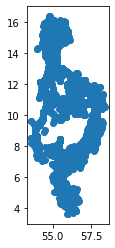

In [12]:
show_df.plot()

In [83]:
import folium

m = folium.Map()

folium.GeoJson(show_df).add_to(m)